## Understand the problem

### Machine Learning Final Project

Researcher: Alistair Clarke

Season: Fall 2018

1. Describe the problem that you have chosen for your final project.

    The primary goal of this project is to create an image ML classifier, which is capable of determining a dog breed from a given dog photo.

2. Provide a link to the kaggle page with details on the problem/dataset.

    Kaggle's link: https://www.kaggle.com/c/dog-breed-identification/data
    
3. What is the input? What is the output?

   The input to this ML problem would be a colored image (150, 150 , 3)
   
   The output would be one of 120 class labels:
   
   Examples:
   - american_staffordshire_terrier
   - beagle
   - boston_bull   
   - boxer
   -    chihuahua
   -    collie
   -    german_shepherd
   -    great_dane
   -    old_english_sheepdog
   -    pug
   
4. What type of problem is this?

    This particular problem is a multi-class classification problem.
    
5. What are the features or attributes that you will use from the dataset.

    - Attributes: Image augmentation
    - Features: Pretrained CNN features
    
6. What is your evaluation metric? Accuracy? RMSE? MAE? Recall/Precision?

   The evaluation metric for this problem would be: Accuracy

## Get Data

- Import necessary libraries
- Import training and test data
- Import labels

In [1]:
# Import Necessary Libraries

import numpy as np 
import pandas as pd
import io
from skimage import io

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Mount Drive

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Setup Base directory

- Setup base directory for future use such as with image extraction and reading

In [0]:
import os

# Make base directory

base_dir = '../content/gdrive/My Drive/ML Dog Breed Classification'

### Read data into Pandas Dataframes

- Load the data into pandas dataframes

In [0]:
# Specify training and testing feature vectors

train_csv = base_dir + '/labels.csv'

In [0]:
# Load feature vectors into dataframes

train_df = pd.read_csv(train_csv)

In [6]:
# Display first 5 rows of training and testing dataframes

train_df.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


## Explore the data

### Retrieve Image Files

Using the unique ids from the csv files, find the corresponding image from the image directories and resize the images to be 150 x 150 pixels for image processing standardization.
The one-hot encode the label for each read-in image.

In [0]:
# Training and testing files

train_dir = base_dir + '/train'

In [0]:
# Display image samples from both training and test sets

def sample_img(path):

  for root, dirs, files in os.walk(path):
      for file_ in files:      
        # Create image path      
        img_file = os.path.join(root, file_)

        dog_img = io.imread(img_file)
        
        break
  
  return dog_img

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


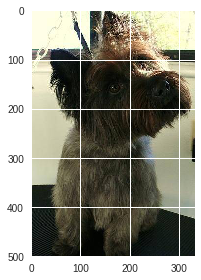

In [9]:
# Sample Training Image

train_img = sample_img(train_dir)

io.imshow(train_img)

(array([118129., 107764.,  59551.,  29369.,  16815.,  23082.,  39816.,
         24193.,  36639.,  44142.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

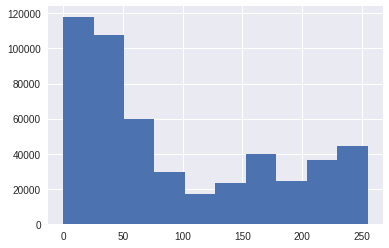

In [10]:
# Plot color histogram

plt.hist(train_img.ravel())

## Structure of the Data

This particular dataset is structured is such a way that the training and test are images in separate directories. Each training image has a unique id which maps to a dog breed in the training csv file.

### Amount of Data

This dataset is made up of:
- 10222 images in total which would be reshaped to (150 x 150 x 3)
- 120 known labels

### Input

- Color images which would be rescaled to 150 x 150 x 3

### Output

- Probability of predicting one of 120 labels

### Output labels needed encoding 

- 120 breeds of dogs labels would be 1-Hot Encoded

### Other Observations

- The displayed image dominant color values ranged between 0 and 75, which indicates that the image is a dark image with possible high contrast.

- Dataframe does have any missing labels (i.e. breeds)

## Prepare the Data

Create a preprocessing pipeline which:

1.   Resizes the images to be 150 x 150 x 3
2.   Rename the images to reflect the breed of dog in image
3.   Create separate directories for each dog breed
4.   Check to ensure that the pandas dataframe of values doesnt have missing values
5.   One-Hot Encode the labels



In [0]:
# Directories for our training,
# validation and test splits

training_dir = os.path.join(base_dir, 'training')
validating_dir = os.path.join(base_dir, 'validating')
testing_dir = os.path.join(base_dir, 'testing')

full_train_dir = os.path.join(base_dir, 'full-training')

if not os.path.exists(training_dir):

  os.mkdir(training_dir)
  
if not os.path.exists(validating_dir):
  
  os.mkdir(validating_dir)
  
if not os.path.exists(testing_dir):
  
  os.mkdir(testing_dir)
  
if not os.path.exists(full_train_dir):

  os.mkdir(full_train_dir)

In [0]:
# Specify base image size

IMG_SIZE = 150

# Specify lists to store training and testing preprocessed images

training_data = []
training_labels = []

#### Feature Generation using a Pre-Trained CNN Model

- Feed images into Pre-Trained CNN to create new features


In [13]:
from keras.applications import VGG16
from keras.applications.resnet50 import preprocess_input

# Load pretrained model VGG16
# Use weights from training on ImageNet
# Do not include the densely connected classifier 
# on top of the convolutional layers.
# include_top = false -> removes regular NN

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) 


# Feature generator function

def feature_generator(image):
  
  x = np.expand_dims(image, axis=0)
  x = preprocess_input(x)

  features = conv_base.predict(x)
  
  return features

58892288/58889256 [==============================] - 2s 0us/step


### Pipeline Methods

- Image Preprocessing Pipeline
- Full Preprocessing Pipeline

In [0]:
import shutil
import cv2
from tqdm import tqdm

# PIPELINE FUNCTION
# Takes dataframe as input

def image_pipeline(dataframe, img_size, training_data, training_labels):
  
  # Counter
  
  count = 0
  
  # Check to ensure that there are no missing values in the dataframe
  # If there are no missing values
  
  if not dataframe.isnull().values.any(): 
  
    # One-Hot Encode the dataframe labels of each image

    # Get the breed column values from data frame

    target_labels = pd.Series(dataframe['breed'])

    # Using the pandas get_dummies library, to encode the target_labels

    encode_1_hot = pd.get_dummies(target_labels, sparse = True)

    # Convert encoded pandas dataframe to numpy array

    one_hot_encoded_labels = np.array(encode_1_hot)
    
    for uid, breed in tqdm(dataframe.values):
      
      # Read in image based on image unique id

      image = io.imread(train_dir + '/{}.jpg'.format(uid)) 
      
      # Find the associated encoded label based on image, save it

      label = one_hot_encoded_labels[count]

      # Resize image

      scaled_img = cv2.resize(image, (img_size, img_size))
      
      # Create new directories to store scaled image if not already created
      
      new_train_dir = os.path.join(training_dir, breed)
      new_test_dir = os.path.join(testing_dir, breed)
      new_valid_dir = os.path.join(validating_dir, breed)
      new_full_train_dir = os.path.join(full_train_dir, breed)
      
      # Check to ensure that directories arent already created
      
      if not os.path.exists(new_train_dir):
  
        os.mkdir(new_train_dir)
    
      if not os.path.exists(new_test_dir):
  
        os.mkdir(new_test_dir)
    
      if not os.path.exists(new_valid_dir):
  
        os.mkdir(new_valid_dir)
    
      if not os.path.exists(new_full_train_dir):
  
        os.mkdir(new_full_train_dir)
    
      # Rename image
      
      renamed_img = breed + '_{}.jpg'.format(count)
    
      # Move scaled image to correct directory
      
      if count <= 7384:
        
        # Training Destination Directory
        
        destination = new_train_dir + '/' + renamed_img
        destination_2 = new_full_train_dir + '/' + renamed_img
        
        if not os.path.exists(destination):
        
          io.imsave(destination, scaled_img)
          
        if not os.path.exists(destination_2):
        
          io.imsave(destination_2, scaled_img)
        
      elif count > 7384 and count <= 8918:
        
        # Test Destination Directory
        
        destination = new_test_dir + '/' + renamed_img
        
        if not os.path.exists(destination):
        
          io.imsave(destination, scaled_img)
        
      elif count > 8918:
        
        # Validation Destination Directory
        
        destination = new_valid_dir + '/' + renamed_img
        destination_2 = new_full_train_dir + '/' + renamed_img
        
        if not os.path.exists(destination):
        
          io.imsave(destination, scaled_img)
          
        # Full Training Destination Directory
        
        if not os.path.exists(destination_2):
        
          io.imsave(destination_2, scaled_img)
        
      # Pass scaled image to generate features
      
      features = feature_generator(scaled_img)
        
      # Add image to training_data and encoded labels to training_labels

      training_data.append(features)
      training_labels.append(label)

      count = count + 1
      
    return training_data, training_labels
  
    
  else:
    
    # If there are missing values 
    # Remove the associate row from the dataframe
    
    dataframe.dropna()
    
    # Call function again - Recursive Function call
    
    return image_pipeline(dataframe, img_size, training_data, training_labels)  
  

In [0]:
# Combine Validation and training sets into one full training set

def combine_sets(set_1, set_2):
  
  full_set = np.concatenate((set_1, set_2), axis = 0)
  
  return full_set

In [0]:
# Import train_test_split directory

from sklearn.model_selection import train_test_split  

  
def full_pipeline(train_df, IMG_SIZE, training_data, training_labels):
  
  # Images Preprocessing Function

  traindata, trainlabels = image_pipeline(train_df, IMG_SIZE, training_data, training_labels)

  # Display shape of training data
  # Convert data to be in value ranges of 0 and 1

  train_data_ = np.array(traindata, np.float32) / 255
  train_labels_ = np.array(trainlabels, np.uint8)

  print('Training Data Shape:', train_data_.shape)
  print('Training Labels Shape:', train_labels_.shape)


  # Split data into training and testing
  # 85% Training, 15% Testing
  # Split Training into training and validation (15% being validation)

  X_train, X_test, y_train, y_test = train_test_split(train_data_, train_labels_, test_size=0.15, random_state=1)

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)


  print('Training Set Shape: ', X_train.shape)
  print('Test Set Shape:', X_test.shape)
  print('Validation Set Shape:', X_val.shape)

  # Reshape feature vectors

  nsamples, nx, ny, nz, channels = X_train.shape

  X_train_ = X_train.reshape((nsamples, -1))


  # Reshape Validation data

  nsamples, nx, ny, nz, channels = X_val.shape

  X_val_ = X_val.reshape((nsamples, -1))
    
  # Reshape feature vectors

  nsamples, nx, ny, nz, channels = X_test.shape

  X_test_ = X_test.reshape((nsamples, -1))

  # Combine Training and Validation Sets

  full_train_features = combine_sets(X_train_, X_val_)

  full_train_labels = combine_sets(y_train, y_val)
    
    
  return X_train_, y_train, X_val_, y_val, X_test_, y_test, full_train_features, full_train_labels

In [17]:
# Execute Full Pipeline Function

X_train_, y_train, X_val_, y_val, X_test_, y_test, full_train_features, full_train_labels = full_pipeline(train_df, IMG_SIZE, training_data, training_labels)

100%|██████████| 10222/10222 [1:06:24<00:00,  2.55it/s]


Training Data Shape: (10222, 1, 4, 4, 512)
Training Labels Shape: (10222, 120)
Training Set Shape:  (7384, 1, 4, 4, 512)
Test Set Shape: (1534, 1, 4, 4, 512)
Validation Set Shape: (1304, 1, 4, 4, 512)


### Reason for using pipelines

The reason why the image_pipeline was used, was to uniformly resize all images to be 150x150x3 and to especially remove any missing dog breeds by dropping the entire row when discovered. The reason why removing missing dog breeds was important for this particular problem, was because we wouldnt want to model to learn null values during the training process, as it would lead to inaccurate accuracy results.

The overall pipeline purpose is to prepare all the inputs for the models, so that those inputs wouldnt have to be cleaned or separated when the time for training and evaluating arrived.

## Select, train and evaluate a model

- K-Nearest Neighbors
- Hyper-tune the values of K
- 4 Layer Dense Neural Network
- Hyper-tune with Data Augmentation
- Convolutional Neural Network
- Hyper-Tune with Data Augmentation

### Experiment 1: Train and Evaluate KNN Model (Baseline)

- K = 1

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model 

def train_knn_model(train_data, train_labels, k):    

    # Implement the KNN model, with 1 neighbors
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # Train partial training set on model (i.e. KNN)

    knn.fit(train_data, train_labels)
    
    print('Training Completed!!')
    
    return knn

In [19]:
# Train KNN with K having a value of 1

knn_model = train_knn_model(X_train_, y_train, 1)

Training Completed!!


In [20]:
from sklearn.metrics import accuracy_score

# Evaluate trained knn model on the validation set

prediction = knn_model.predict(X_val_)

print('Validation Set Accuracy Score:', accuracy_score(y_val, prediction))

Validation Set Accuracy Score: 0.29524539877300615


### Tune Hyper-Parameters - KNN Nearest Neighbors

Experiement with different values of K, to see if validation accuracy improves.
Examples for the value of K:
- K = 3
- K = 5
- K = 15
- K = 25

### Experiment 2: Train and Evaluate KNN Model 

- K = 15

In [21]:
# Train KNN with K having a value of 15

knn_model_15 = train_knn_model(X_train_, y_train, 15)

prediction = knn_model_15.predict(X_val_)

print('Validation Accuracy Score:', accuracy_score(y_val, prediction))

Training Completed!!
Validation Accuracy Score: 0.05291411042944785


### Experiment 3: Train and Evaluate KNN Model 

- K = 25

In [22]:
# Train KNN with K having a value of 25

knn_model_25 = train_knn_model(X_train_, y_train, 25)

prediction = knn_model_25.predict(X_val_)

print('Validation Accuracy Score:', accuracy_score(y_val, prediction))

Training Completed!!
Validation Accuracy Score: 0.024539877300613498


### Experiment 4: Train and Evaluate KNN Model 

- K = 5

In [23]:
# Train KNN with K having a value of 5

knn_model_5 = train_knn_model(X_train_, y_train, 5)

prediction = knn_model_5.predict(X_val_)

print('Validation Accuracy Score:', accuracy_score(y_val, prediction))

Training Completed!!
Validation Accuracy Score: 0.1441717791411043


### Experiment 5: Train and Evaluate KNN Model 

- K = 3

In [24]:
# Train KNN with K having a value of 3

knn_model_3 = train_knn_model(X_train_, y_train, 3)

prediction = knn_model_3.predict(X_val_)

print('Validation Set Accuracy Score:', accuracy_score(y_val, prediction))

Training Completed!!
Validation Set Accuracy Score: 0.20245398773006135


### Experiment 6: Train and Evaluate on a 4 Layer Dense Neural Network (Baseline)

- Fit and train to 4-dense network to training data
- Evaluate against validation data
- 4 Hidden Layers, with 128 units per layer
- 2 Dropout Layers of 55%
- 30 Epochs

In [0]:
from keras import layers
from keras import models

def L4_network_creation(train_features, train_labels, validation_features, validation_labels, units, epochs):

  # Specify network type: Sequential Model

  simple_model = models.Sequential()

  # Define layers

  simple_model.add(layers.Dense(units, activation='relu', input_dim=(4*4*512)))

  simple_model.add(layers.Dense(units, activation='relu'))

  # Dropout layer (dropout 55%)

  simple_model.add(layers.Dropout(0.55))

  simple_model.add(layers.Dense(units, activation='relu'))
  
  # Dropout layer (dropout 55%)

  simple_model.add(layers.Dropout(0.55))
  
  simple_model.add(layers.Dense(units, activation='relu'))

  # Output layer

  simple_model.add(layers.Dense(120, activation='softmax'))

  # Compile the network

  simple_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  # Fit and train model
  
  history = simple_model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=15,
                    validation_data=(validation_features, validation_labels))
  
  return simple_model, history

In [26]:
# Create and train network
# Train for 30 epochs

model, histo = L4_network_creation(X_train_, y_train, X_val_, y_val, 128, 30) 

Train on 7384 samples, validate on 1304 samples
Epoch 1/30
7384/7384 [==============================] - 5s 714us/step - loss: 4.5871 - acc: 0.0271 - val_loss: 4.0803 - val_acc: 0.0859
Epoch 2/30
7384/7384 [==============================] - 4s 593us/step - loss: 3.7331 - acc: 0.0987 - val_loss: 3.2734 - val_acc: 0.1641
Epoch 3/30
7384/7384 [==============================] - 4s 583us/step - loss: 3.1449 - acc: 0.1733 - val_loss: 2.9146 - val_acc: 0.2561
Epoch 4/30
7384/7384 [==============================] - 4s 583us/step - loss: 2.8289 - acc: 0.2140 - val_loss: 2.7097 - val_acc: 0.2937
Epoch 5/30
7384/7384 [==============================] - 4s 585us/step - loss: 2.5387 - acc: 0.2764 - val_loss: 2.6710 - val_acc: 0.2914
Epoch 6/30
7384/7384 [==============================] - 4s 582us/step - loss: 2.3277 - acc: 0.3157 - val_loss: 2.5784 - val_acc: 0.3344
Epoch 7/30
7384/7384 [==============================] - 4s 588us/step - loss: 2.1560 - acc: 0.3569 - val_loss: 2.5493 - val_acc: 0.3397


### Plotter Function

- Plots performance results from networks

In [0]:
import matplotlib.pyplot as plt

def plotter(hist):

  acc = hist.history['acc']
  val_acc = hist.history['val_acc']
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

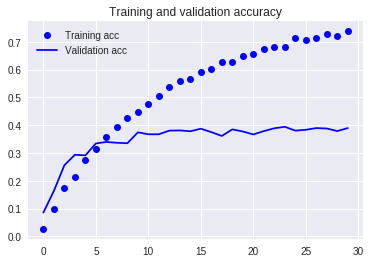

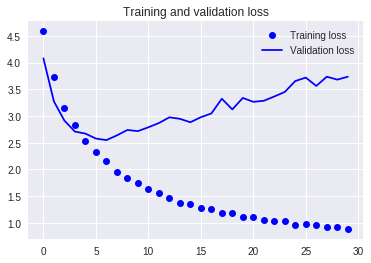

In [28]:
# Call Plotter Function

plotter(histo)

### Tune Hyper-Parameters - Dense Neural Network

Experiement with different architectures, to see if validation accuracy improves.
Examples for the possible architectures:

- 4 Hidden Layers with 32 units per layer
- 4 Hidden Layers with 64 units per layer
- 4 Hidden Layers with 128 units - 15 Epochs
- 5 Hidden Layers with 64 units per layer, 2 layers of L2 Regularization and Dropout of 50%
- 5 Hidden Layers with 128 units per layer, 2 layers of L2 Regularization and Dropout of 50%
- 5 Hidden Layers with 512 units per layer, 2 layers of L2 Regularization and Dropout of 50% -  20 Epochs

### Experiment 7: Train and Evaluate on a 4 Layer Dense Network

- 32 units per Hidden Layer
- 30 Epochs

In [29]:
# Create and train network
# Train for 30 epochs

model, histo = L4_network_creation(X_train_, y_train, X_val_, y_val, 32, 30) 

Train on 7384 samples, validate on 1304 samples
Epoch 1/30
7384/7384 [==============================] - 4s 575us/step - loss: 4.7399 - acc: 0.0153 - val_loss: 4.6268 - val_acc: 0.0253
Epoch 2/30
7384/7384 [==============================] - 4s 531us/step - loss: 4.5131 - acc: 0.0351 - val_loss: 4.4436 - val_acc: 0.0376
Epoch 3/30
7384/7384 [==============================] - 4s 528us/step - loss: 4.2967 - acc: 0.0492 - val_loss: 4.2131 - val_acc: 0.0690
Epoch 4/30
7384/7384 [==============================] - 4s 525us/step - loss: 4.1300 - acc: 0.0592 - val_loss: 4.0784 - val_acc: 0.0844
Epoch 5/30
7384/7384 [==============================] - 4s 530us/step - loss: 3.9785 - acc: 0.0685 - val_loss: 4.0034 - val_acc: 0.0821
Epoch 6/30
7384/7384 [==============================] - 4s 532us/step - loss: 3.8424 - acc: 0.0840 - val_loss: 3.9302 - val_acc: 0.0943
Epoch 7/30
7384/7384 [==============================] - 4s 530us/step - loss: 3.7703 - acc: 0.0841 - val_loss: 3.8657 - val_acc: 0.0943


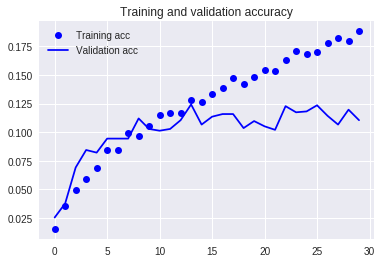

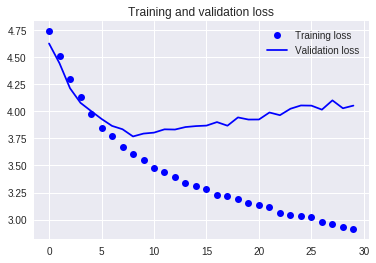

In [30]:
# Call Plotter Function

plotter(histo)

### Experiment 8: Train and Evaluate on a 4 Layer Dense Network

- 64 units per Hidden Layer
- 30 Epochs

In [31]:
# Create and train network
# Train for 30 epochs

model, histo = L4_network_creation(X_train_, y_train, X_val_, y_val, 64, 30) 

Train on 7384 samples, validate on 1304 samples
Epoch 1/30
7384/7384 [==============================] - 4s 599us/step - loss: 4.6946 - acc: 0.0226 - val_loss: 4.3884 - val_acc: 0.0475
Epoch 2/30
7384/7384 [==============================] - 4s 543us/step - loss: 4.1411 - acc: 0.0595 - val_loss: 3.6506 - val_acc: 0.1189
Epoch 3/30
7384/7384 [==============================] - 4s 545us/step - loss: 3.6957 - acc: 0.0917 - val_loss: 3.3417 - val_acc: 0.1664
Epoch 4/30
7384/7384 [==============================] - 4s 547us/step - loss: 3.4187 - acc: 0.1211 - val_loss: 3.1416 - val_acc: 0.2048
Epoch 5/30
7384/7384 [==============================] - 4s 545us/step - loss: 3.2368 - acc: 0.1471 - val_loss: 2.9938 - val_acc: 0.2385
Epoch 6/30
7384/7384 [==============================] - 4s 541us/step - loss: 3.0561 - acc: 0.1751 - val_loss: 2.9385 - val_acc: 0.2408
Epoch 7/30
7384/7384 [==============================] - 4s 539us/step - loss: 2.9268 - acc: 0.1854 - val_loss: 2.8100 - val_acc: 0.2830


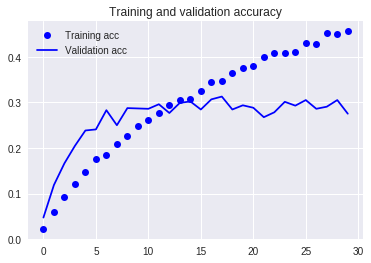

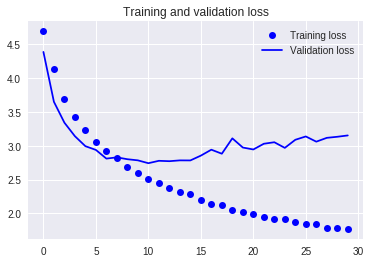

In [32]:
# Call Plotter Function

plotter(histo)

### Experiment 9: Train and Evaluate on a 4 Layer Dense Network

- 128 units per Hidden Layer
- 15 Epochs

In [33]:
# Create and train network
# Train for 15 epochs

model, histo = L4_network_creation(X_train_, y_train, X_val_, y_val, 128, 15) 

Train on 7384 samples, validate on 1304 samples
Epoch 1/15
7384/7384 [==============================] - 5s 641us/step - loss: 4.5362 - acc: 0.0341 - val_loss: 3.8821 - val_acc: 0.0675
Epoch 2/15
7384/7384 [==============================] - 4s 577us/step - loss: 3.6179 - acc: 0.1017 - val_loss: 3.2333 - val_acc: 0.1848
Epoch 3/15
7384/7384 [==============================] - 4s 586us/step - loss: 3.1529 - acc: 0.1667 - val_loss: 2.8727 - val_acc: 0.2469
Epoch 4/15
7384/7384 [==============================] - 4s 577us/step - loss: 2.8146 - acc: 0.2180 - val_loss: 2.7254 - val_acc: 0.2814
Epoch 5/15
7384/7384 [==============================] - 4s 584us/step - loss: 2.5565 - acc: 0.2638 - val_loss: 2.6063 - val_acc: 0.3129
Epoch 6/15
7384/7384 [==============================] - 4s 582us/step - loss: 2.3133 - acc: 0.3173 - val_loss: 2.6668 - val_acc: 0.3328
Epoch 7/15
7384/7384 [==============================] - 4s 578us/step - loss: 2.1724 - acc: 0.3414 - val_loss: 2.5411 - val_acc: 0.3390


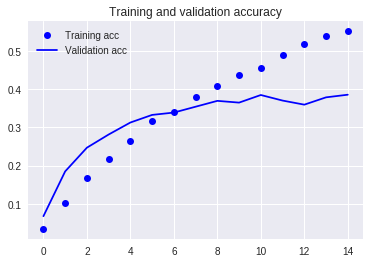

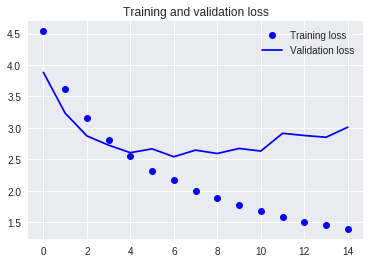

In [34]:
# Call Plotter Function

plotter(histo)

### 5 Layer Dense Neural Network

- Fit and train to 5-dense network to training data
- Evaluate against validation data
- 5 Hidden Layers
- 2 Dropout Layers of 50%
- 2 Layers with L2 Regularization

In [0]:
from keras import regularizers 

def L5_network_creation(train_features, train_labels, validation_features, validation_labels, units, epochs):

  # Specify network type: Sequential Model

  simple_model = models.Sequential()

  # Define layers

  simple_model.add(layers.Dense(units, activation='relu', input_dim=(4*4*512)))

  simple_model.add(layers.Dense(units, activation='relu'))

  # Dropout layer (dropout 60%)

  simple_model.add(layers.Dropout(0.50))

  simple_model.add(layers.Dense(units, activation='relu'))
  
  # Dropout layer (dropout 55%)

  simple_model.add(layers.Dropout(0.50))
  
  simple_model.add(layers.Dense(units, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  
  simple_model.add(layers.Dense(units, kernel_regularizer=regularizers.l2(0.001), activation='relu'))

  # Output layer

  simple_model.add(layers.Dense(120, activation='softmax'))

  # Compile the network

  simple_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  # Fit and train model
  
  history = simple_model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=15,
                    validation_data=(validation_features, validation_labels))
  
  return simple_model, history

### Experiment 10: Train and Evaluate on a 5 Layer Dense Network

- 64 units per Hidden Layer
- 30 Epochs

In [36]:
# Create and train network
# Train for 30 epochs

model, histo = L5_network_creation(X_train_, y_train, X_val_, y_val, 64, 30) 

Train on 7384 samples, validate on 1304 samples
Epoch 1/30
7384/7384 [==============================] - 5s 680us/step - loss: 4.6424 - acc: 0.0241 - val_loss: 4.1958 - val_acc: 0.0437
Epoch 2/30
7384/7384 [==============================] - 4s 601us/step - loss: 4.0060 - acc: 0.0580 - val_loss: 3.7578 - val_acc: 0.0959
Epoch 3/30
7384/7384 [==============================] - 4s 605us/step - loss: 3.6911 - acc: 0.0827 - val_loss: 3.6724 - val_acc: 0.1074
Epoch 4/30
7384/7384 [==============================] - 4s 601us/step - loss: 3.4487 - acc: 0.1085 - val_loss: 3.4563 - val_acc: 0.1273
Epoch 5/30
7384/7384 [==============================] - 4s 606us/step - loss: 3.2609 - acc: 0.1285 - val_loss: 3.3884 - val_acc: 0.1618
Epoch 6/30
7384/7384 [==============================] - 4s 602us/step - loss: 3.1053 - acc: 0.1522 - val_loss: 3.4189 - val_acc: 0.1503
Epoch 7/30
7384/7384 [==============================] - 4s 607us/step - loss: 2.9575 - acc: 0.1715 - val_loss: 3.4347 - val_acc: 0.1748


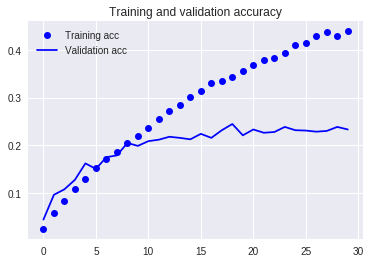

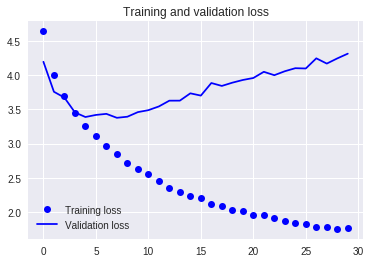

In [37]:
# Call Plotter Function

plotter(histo)

### Experiment 11: Train and Evaluate on a 5 Layer Dense Network

- 128 units per Hidden Layer
- 30 Epochs

In [38]:
# Create and train network
# Train for 30 epochs

model, histo = L5_network_creation(X_train_, y_train, X_val_, y_val, 128, 30) 

Train on 7384 samples, validate on 1304 samples
Epoch 1/30
7384/7384 [==============================] - 5s 721us/step - loss: 4.6369 - acc: 0.0322 - val_loss: 4.0769 - val_acc: 0.0805
Epoch 2/30
7384/7384 [==============================] - 5s 643us/step - loss: 3.6431 - acc: 0.1132 - val_loss: 3.3430 - val_acc: 0.1511
Epoch 3/30
7384/7384 [==============================] - 5s 642us/step - loss: 3.1308 - acc: 0.1697 - val_loss: 3.1136 - val_acc: 0.1963
Epoch 4/30
7384/7384 [==============================] - 5s 639us/step - loss: 2.8050 - acc: 0.2268 - val_loss: 3.0225 - val_acc: 0.2216
Epoch 5/30
7384/7384 [==============================] - 5s 637us/step - loss: 2.5221 - acc: 0.2799 - val_loss: 2.9676 - val_acc: 0.2692
Epoch 6/30
7384/7384 [==============================] - 5s 645us/step - loss: 2.2987 - acc: 0.3262 - val_loss: 2.8491 - val_acc: 0.2753
Epoch 7/30
7384/7384 [==============================] - 5s 639us/step - loss: 2.0858 - acc: 0.3696 - val_loss: 2.8659 - val_acc: 0.3075


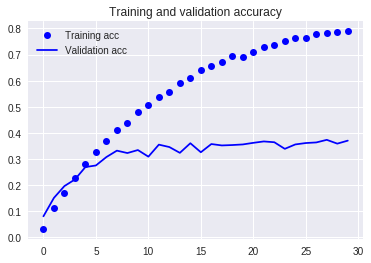

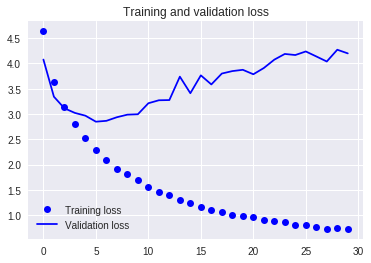

In [39]:
# Call Plotter Function

plotter(histo)

### Experiment 12: Train and Evaluate on a 5 Layer Dense Network

- 512 units per Hidden Layer
- 20 Epochs

In [40]:
# Create and train network
# Train for 20 epochs

model, histo = L5_network_creation(X_train_, y_train, X_val_, y_val, 512, 20) 

Train on 7384 samples, validate on 1304 samples
Epoch 1/20
7384/7384 [==============================] - 7s 959us/step - loss: 4.3582 - acc: 0.0634 - val_loss: 3.5566 - val_acc: 0.1273
Epoch 2/20
7384/7384 [==============================] - 6s 825us/step - loss: 2.9194 - acc: 0.2305 - val_loss: 2.8089 - val_acc: 0.2669
Epoch 3/20
7384/7384 [==============================] - 6s 827us/step - loss: 2.2890 - acc: 0.3509 - val_loss: 2.7115 - val_acc: 0.3351
Epoch 4/20
7384/7384 [==============================] - 6s 832us/step - loss: 1.8442 - acc: 0.4518 - val_loss: 2.7374 - val_acc: 0.3459
Epoch 5/20
7384/7384 [==============================] - 6s 827us/step - loss: 1.5171 - acc: 0.5451 - val_loss: 2.9383 - val_acc: 0.3551
Epoch 6/20
7384/7384 [==============================] - 6s 813us/step - loss: 1.2493 - acc: 0.6276 - val_loss: 3.3151 - val_acc: 0.3666
Epoch 7/20
7384/7384 [==============================] - 6s 819us/step - loss: 1.0919 - acc: 0.6771 - val_loss: 3.2534 - val_acc: 0.3865


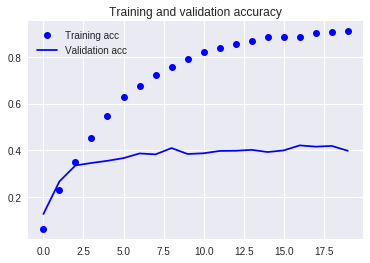

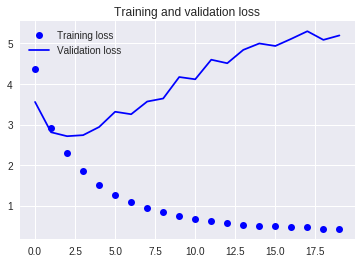

In [41]:
# Call Plotter Function

plotter(histo)

###  Train tuned model and Evaluate (KNN)

- Train KNN model where K = 1 on the entire training set
- Evaluate KNN model where K = 1, on the test set

In [42]:
# Train model on entire training set

# Train KNN with K having a value of 1

knn_model = train_knn_model(full_train_features, full_train_labels, 1)

prediction = knn_model.predict(X_test_)

print('Test Set Accuracy Score:', accuracy_score(y_test, prediction))

Training Completed!!
Test Set Accuracy Score: 0.30834419817470665


###  Train tuned model and Evaluate (Neural Network)

- Train 5 Layer Dense Network with 512 units - 20 Epochs 
- Evaluate on the test set

In [50]:
# Create and train network
# Train for 20 epochs

model, histo = L5_network_creation(full_train_features, full_train_labels, X_test_, y_test, 512, 20) 

Train on 8688 samples, validate on 1534 samples
Epoch 1/20
8688/8688 [==============================] - 8s 971us/step - loss: 4.1599 - acc: 0.0854 - val_loss: 3.1829 - val_acc: 0.1936
Epoch 2/20
8688/8688 [==============================] - 7s 809us/step - loss: 2.8301 - acc: 0.2385 - val_loss: 2.7205 - val_acc: 0.2731
Epoch 3/20
8688/8688 [==============================] - 7s 816us/step - loss: 2.2530 - acc: 0.3590 - val_loss: 2.5157 - val_acc: 0.3468
Epoch 4/20
8688/8688 [==============================] - 7s 817us/step - loss: 1.8396 - acc: 0.4525 - val_loss: 2.5900 - val_acc: 0.3755
Epoch 5/20
8688/8688 [==============================] - 7s 816us/step - loss: 1.5348 - acc: 0.5449 - val_loss: 2.6961 - val_acc: 0.3970
Epoch 6/20
8688/8688 [==============================] - 7s 821us/step - loss: 1.2779 - acc: 0.6111 - val_loss: 3.0525 - val_acc: 0.4009
Epoch 7/20
8688/8688 [==============================] - 7s 816us/step - loss: 1.0910 - acc: 0.6707 - val_loss: 3.2553 - val_acc: 0.4159


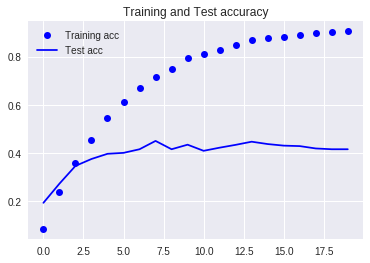

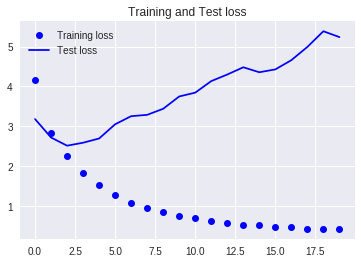

In [52]:
acc = histo.history['acc']
val_acc = histo.history['val_acc']
loss = histo.history['loss']
val_loss = histo.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()

plt.show()

#### Final Conclusions

It can be said that for this particular problem of classifying dog breeds, the 5 Layer 512 unit Dense Neural Network, had the better performance when compared to the KNN model architecture.

Accuracy Comparison:

KNN: a test accuracy of 30%.
Regular Dense Neural Network: a test accuracy of 45%

With more training data, I personally believe that the models would perform much more accurately.

### Future Work

If given more time, I would have liked to:

- Experiement with SVC models
- Try Pre-Trained CNN
- Explored different Neural Network Architectures
- Source more training data to possibly improve training results
- Experiment with Localization 